In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_house = pd.read_csv('../data/train.csv', index_col=0)
df_house_test = pd.read_csv('../data/test.csv', index_col=0)
df_all = pd.concat((df_house.iloc[:, :-1], df_house_test))

Columns with most missing values

In [3]:
# missing values
df_all.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
dtype: int64

# Go through variables one by one

### MSSubClass

In [424]:
df_all['MSSubClass'].isnull().sum()

0

In [423]:
df_all['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [425]:
# MSSubClass is categorical though it is numeric
df_all_new = pd.get_dummies(df_all['MSSubClass'].replace([85, 75, 45, 180, 40, 150], 'Other'), prefix='MSSubClass')
df_all_new.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Other
Id,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### MSZoning

In [426]:
# mszoning
df_house.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528
FV         214014
RH         131558
RL         191004
RM         126316
Name: SalePrice, dtype: int64

In [427]:
df_house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [428]:
df_house_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [429]:
df_house_test['MSZoning'].isnull().sum()

4

In [430]:
cur_var = pd.get_dummies(df_all['MSZoning'], prefix='MSZoning')

In [431]:
df_all_new = df_all_new.join(cur_var)

In [432]:
# LotFrontage
df_all['LotFrontage'].isnull().sum()

486

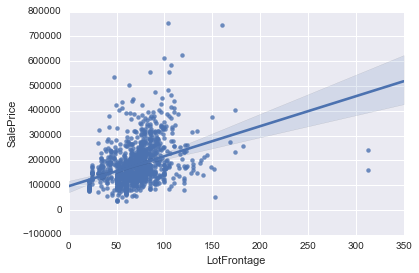

In [433]:
sns.regplot('LotFrontage', 'SalePrice', df_house);

In [434]:
# going to replace missing values with the mean
cur_var = df_all['LotFrontage'].fillna(df_all['LotFrontage'].mean())
df_all_new = df_all_new.join(cur_var)

### LotArea

In [435]:
df_all['LotArea'].isnull().sum()

0

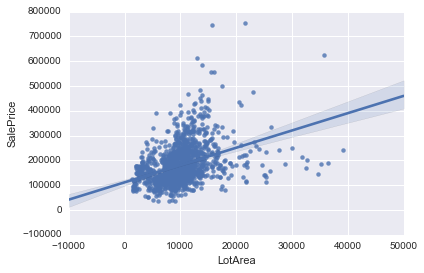

In [436]:
sns.regplot('LotArea', 'SalePrice', df_house[df_house['LotArea'] < 40000]);

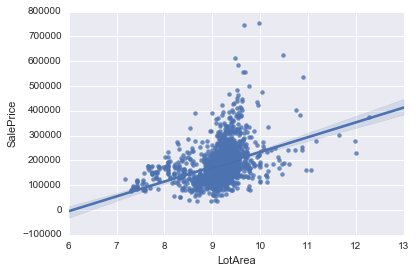

In [437]:
sns.regplot(np.log(df_house['LotArea']), df_house['SalePrice'])

In [438]:
df_house[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [439]:
np.corrcoef(np.log(df_house['LotArea']), df_house['SalePrice'])

array([[ 1.        ,  0.38852027],
       [ 0.38852027,  1.        ]])

Add logged LotArea to dataframe

In [440]:
df_all['LotArea'].isnull().sum()

0

In [441]:
df_all_new['LotArea'] = np.log(df_all['LotArea'] + 1)

### Street

In [442]:
df_all['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [443]:
df_house['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [444]:
df_house_test['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [445]:
df_house.groupby('Street')['SalePrice'].mean()

Street
Grvl    130190
Pave    181130
Name: SalePrice, dtype: int64

In [446]:
cur_var = pd.get_dummies(df_all['Street'], prefix='Street')
df_all_new = df_all_new.join(cur_var)

### Alley

In [447]:
df_all['Alley'].isnull().sum()

2721

In [448]:
df_all['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [449]:
cur_var = pd.get_dummies(df_all['Alley'].fillna('None'), prefix='Alley')
cur_var.head()

,Alley_Grvl,Alley_None,Alley_Pave
Id,,,
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0


In [450]:
df_all_new = df_all_new.join(cur_var)

### LotShape

In [451]:
df_all['LotShape'].isnull().sum()

0

In [452]:
df_all['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [453]:
df_house.groupby('LotShape')['SalePrice'].mean()

LotShape
IR1    206101
IR2    239833
IR3    216036
Reg    164754
Name: SalePrice, dtype: int64

Doesn't look like much difference between Lot Shapes. Will just create two classes. Either irregular on regular

In [454]:
df_all_new['LotShape'] = np.where(df_all['LotShape'] == 'Reg', 1, 0)

In [455]:
df_all_new['LotShape'].value_counts()

1    1859
0    1060
Name: LotShape, dtype: int64

### LandContour

In [456]:
df_all['LandContour'].isnull().sum()

0

In [457]:
df_all['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [458]:
df_house.groupby('LandContour')['SalePrice'].mean()

LandContour
Bnk    143104
HLS    231533
Low    203661
Lvl    180183
Name: SalePrice, dtype: int64

In [459]:
cur_var = pd.get_dummies(df_all['LandContour'], prefix='LandContour')
df_all_new = df_all_new.join(cur_var)

### Utilities

In [460]:
df_all['Utilities'].isnull().sum()

2

In [461]:
df_all['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

This is a completely useless feature. Will not use

### LotConfig

In [462]:
df_all['LotConfig'].isnull().sum()

0

In [463]:
df_all['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [464]:
df_house.groupby('LotConfig')['SalePrice'].mean()

LotConfig
Corner     181623
CulDSac    223854
FR2        177934
FR3        208475
Inside     176938
Name: SalePrice, dtype: int64

Not many FR3. Will make both FR2 and FR3 just FR

In [465]:
cur_var = pd.get_dummies(df_all['LotConfig'].replace(['FR2', 'FR3'], 'FR'), 'LotConfig')
df_all_new = df_all_new.join(cur_var)

### LandSlope

In [466]:
df_all['LandSlope'].isnull().sum()

0

In [467]:
df_all['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [468]:
cur_var = pd.get_dummies(df_all['LandSlope'], 'LandSlope')
df_all_new = df_all_new.join(cur_var)

### Neighborhood

In [469]:
df_all['Neighborhood'].isnull().sum()

0

In [470]:
df_all['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [471]:
df_house.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    194870
Blueste    137500
BrDale     104493
BrkSide    124834
ClearCr    212565
CollgCr    197965
Crawfor    210624
Edwards    128219
Gilbert    192854
IDOTRR     100123
MeadowV     98576
Mitchel    156270
NAmes      145847
NPkVill    142694
NWAmes     189050
NoRidge    335295
NridgHt    316270
OldTown    128225
SWISU      142591
Sawyer     136793
SawyerW    186555
Somerst    225379
StoneBr    310499
Timber     242247
Veenker    238772
Name: SalePrice, dtype: int64

In [472]:
cur_var = pd.get_dummies(df_all['Neighborhood'], 'Neighborhood')
df_all_new = df_all_new.join(cur_var)

### Condition1

In [473]:
df_all['Condition1'].isnull().sum()

0

In [474]:
df_all['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [475]:
df_house.groupby('Condition1')['SalePrice'].mean()

Condition1
Artery    135091
Feedr     142475
Norm      184495
PosA      225875
PosN      215184
RRAe      138400
RRAn      184396
RRNe      190750
RRNn      212400
Name: SalePrice, dtype: int64

Combine RRAe, RRNe, RRAn, RRNn. Combine PosA and PosN Combine them

In [476]:
temp = df_all['Condition1'].replace(['RRAe', 'RRNe', 'RRAn', 'RRNn'], 'RR').replace(['PosA', 'PosN'], 'Pos')
temp.value_counts()

Norm      2511
Feedr      164
RR          93
Artery      92
Pos         59
Name: Condition1, dtype: int64

In [477]:
cur_var = pd.get_dummies(temp, prefix='Condition1')
df_all_new = df_all_new.join(cur_var)

### Condition2

In [478]:
df_all['Condition2'].isnull().sum()

0

In [479]:
df_all['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

Not enough data. Not going to use

### BldgType

In [480]:
df_all['BldgType'].isnull().sum()

0

In [481]:
df_all['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [482]:
cur_var = pd.get_dummies(df_all['BldgType'], 'BldgType')
df_all_new = df_all_new.join(cur_var)

### HouseStyle

In [483]:
df_all['HouseStyle'].isnull().sum()

0

In [484]:
df_all['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [485]:
df_house.groupby('HouseStyle')['SalePrice'].mean()

HouseStyle
1.5Fin    143116
1.5Unf    110150
1Story    175985
2.5Fin    220000
2.5Unf    157354
2Story    210051
SFoyer    135074
SLvl      166703
Name: SalePrice, dtype: int64

In [486]:
df_house['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

No 2.5 finished in test set!

In [487]:
df_house_test['HouseStyle'].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

Have just one 1.5 and one 2.5 category

In [488]:
temp = df_all['HouseStyle'].replace(['1.5Fin', '1.5Unf'], '1.5').replace(['2.5Fin', '2.5Unf'], '2.5')
temp.value_counts()

1Story    1471
2Story     872
1.5        333
SLvl       128
SFoyer      83
2.5         32
Name: HouseStyle, dtype: int64

In [489]:
cur_var = pd.get_dummies(temp, prefix='HouseStyle')
df_all_new = df_all_new.join(cur_var)

### OverallQual

In [490]:
df_all['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

In [491]:
df_house.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      50150
2      51770
3      87473
4     108420
5     133523
6     161603
7     207716
8     274735
9     367513
10    438588
Name: SalePrice, dtype: int64

In [492]:
df_house_test['OverallQual'].value_counts()

5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64

Map 1-3, 4-7, 8-10 together

In [493]:
df_all_new['OverallQual'] = df_all['OverallQual'].map(lambda x: -1 if x < 4 else 0 if x < 8 else 1)

In [494]:
df_all_new['OverallQual'].value_counts()

 0    2382
 1     480
-1      57
Name: OverallQual, dtype: int64

### OverallCond

In [495]:
df_all['OverallCond'].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [496]:
df_house.groupby('OverallCond')['SalePrice'].mean()

OverallCond
1     61000
2    141986
3    101929
4    120438
5    203146
6    153961
7    158145
8    155651
9    216004
Name: SalePrice, dtype: int64

Use same mapping as OverallQual

In [497]:
df_all_new['OverallCond'] = df_all['OverallCond'].map(lambda x: -1 if x < 4 else 0 if x < 8 else 1)

In [498]:
df_all_new['OverallCond'].value_counts()

 0    2667
 1     185
-1      67
Name: OverallCond, dtype: int64

### YearBuilt
Years usually need to be binned

In [499]:
year_built_new = pd.qcut(df_all['YearBuilt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])

In [500]:
pd.concat((year_built_new, df_all['YearBuilt']), axis=1).head(15)

,YearBuilt,YearBuilt
Id,,
1,new,2003
2,middle,1976
3,new,2001
4,oldest,1915
5,new,2000
6,new,1993
7,newest,2004
8,middle,1973
9,oldest,1931


In [501]:
cur_var = pd.get_dummies(year_built_new, 'YearBuilt')

In [502]:
df_all_new = df_all_new.join(cur_var)

### YearRemodAdd

In [503]:
def makeRemodel(row):
    years_since_remod = 2010 - row['YearRemodAdd']
    if row['YearBuilt'] == row['YearRemodAdd']:
        if years_since_remod <= 10:
            return 'New'
        else:
            return 'Never'
    if years_since_remod <= 10:
        return 'Remod'
    return 'Never'

In [504]:
remod = df_all.apply(makeRemodel, axis=1)

In [505]:
remod.value_counts()

Never    1839
Remod     573
New       507
dtype: int64

In [506]:
cur_var = pd.get_dummies(remod, prefix='YearRemodAdd')
df_all_new = df_all_new.join(cur_var)

### RoofStyle

In [507]:
df_all['RoofStyle'].isnull().sum()

0

In [508]:
df_all['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [509]:
df_house.groupby('RoofStyle')['SalePrice'].mean()

RoofStyle
Flat       194690
Gable      171483
Gambrel    148909
Hip        218876
Mansard    180568
Shed       225000
Name: SalePrice, dtype: int64

Combining the lowest occurring roofs into other

In [510]:
temp = df_all['RoofStyle'].replace(['Gambrel', 'Flat', 'Mansard', 'Shed'], 'Other')
temp.value_counts()

Gable    2310
Hip       551
Other      58
Name: RoofStyle, dtype: int64

In [511]:
cur_var = pd.get_dummies(temp, prefix='RoofStyle')
df_all_new = df_all_new.join(cur_var)

### RoofMatl

In [512]:
df_all['RoofMatl'].isnull().sum()

0

In [513]:
df_all['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

Very little Data. Make 0/1 for whether its compshg or not

In [514]:
df_all_new['RoofMatl'] = (df_all['RoofMatl'] == 'CompShg') * 1

In [515]:
df_all_new['RoofMatl'].value_counts()

1    2876
0      43
Name: RoofMatl, dtype: int64

### Exterior1st

In [516]:
df_all['Exterior1st'].isnull().sum()

1

In [517]:
df_all['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [518]:
df_house.groupby('Exterior1st')['SalePrice'].mean()

Exterior1st
AsbShng    107385
AsphShn    100000
BrkComm     71000
BrkFace    194573
CBlock     105000
CemntBd    231690
HdBoard    163077
ImStucc    262000
MetalSd    149422
Plywood    175942
Stone      258500
Stucco     162990
VinylSd    213732
Wd Sdng    149841
WdShing    150655
Name: SalePrice, dtype: int64

In [519]:
temp = df_all['Exterior1st'].replace(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], 'Other')
temp = temp.fillna('Other')
temp.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Other        14
Name: Exterior1st, dtype: int64

In [520]:
cur_var = pd.get_dummies(temp, prefix='Exterior1st')
df_all_new = df_all_new.join(cur_var)

### Exterior2nd

In [521]:
df_all['Exterior2nd'].isnull().sum()

1

In [522]:
df_all['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [523]:
temp = df_all['Exterior2nd'].replace(['Brk Cmn', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], 'Other')
temp = temp.fillna('Other')
temp.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Other        52
Stucco       47
BrkFace      47
AsbShng      38
Name: Exterior2nd, dtype: int64

In [524]:
cur_var = pd.get_dummies(temp, prefix='Exterior2nd')
df_all_new = df_all_new.join(cur_var)

### MasVnrType

In [525]:
df_all['MasVnrType'].isnull().sum()

24

In [526]:
df_all['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [527]:
cur_var = pd.get_dummies(df_all['MasVnrType'].fillna('None'), prefix='MasVnrType')
df_all_new = df_all_new.join(cur_var)

### MasVnrArea

In [528]:
df_all['MasVnrArea'].isnull().sum()

23

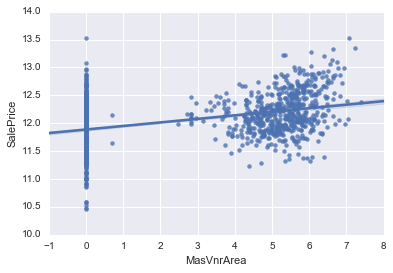

In [529]:
sns.regplot(np.log(df_house['MasVnrArea'] + 1), np.log(df_house['SalePrice']));

In [530]:
df_all_new['MasVnrArea'] = np.log(df_all['MasVnrArea'].fillna(0) + 1)

### ExterQual

In [531]:
df_all['ExterQual'].isnull().sum()

0

In [532]:
df_all['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [533]:
cur_var = pd.get_dummies(df_all['ExterQual'], 'ExterQual')
df_all_new = df_all_new.join(cur_var)

### ExterCond

In [534]:
df_all['ExterCond'].isnull().sum()

0

In [535]:
df_all['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [536]:
df_house.groupby('ExterCond')['SalePrice'].mean()

ExterCond
Ex    201333
Fa    102595
Gd    168897
Po     76500
TA    184034
Name: SalePrice, dtype: int64

In [537]:
cur_var = df_all['ExterCond'].map({'TA':0, 'Gd':1, 'Ex':1, 'Po':-1, 'Fa':-1})
cur_var.value_counts()

 0    2538
 1     311
-1      70
Name: ExterCond, dtype: int64

In [538]:
df_all_new = df_all_new.join(cur_var)

### Foundation

In [539]:
df_all['Foundation'].isnull().sum()

0

In [540]:
df_all['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [541]:
temp = df_all['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other')
temp.value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Other       65
Name: Foundation, dtype: int64

In [542]:
cur_var = pd.get_dummies(temp, prefix='Foundation')
df_all_new = df_all_new.join(cur_var)

### BsmtQual

In [543]:
df_all['BsmtQual'].isnull().sum()

81

In [544]:
df_all['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [545]:
cur_var = pd.get_dummies(df_all['BsmtQual'].fillna('None'), 'BsmtQual')
df_all_new = df_all_new.join(cur_var)

### BsmtCond

In [546]:
df_all['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [547]:
temp = df_all['BsmtCond'].fillna('None').replace(['Po'], 'Fa')
temp.value_counts()

TA      2606
Gd       122
Fa       109
None      82
Name: BsmtCond, dtype: int64

In [548]:
cur_var = pd.get_dummies(temp, prefix='BsmtCond')
df_all_new = df_all_new.join(cur_var)

### BsmtExposure

In [549]:
df_all['BsmtExposure'].isnull().sum()

82

In [550]:
df_all['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [551]:
cur_var = pd.get_dummies(df_all['BsmtExposure'].fillna('None'), prefix='BsmtExposure')
df_all_new = df_all_new.join(cur_var)

### BsmtFinType1

In [552]:
df_all['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [553]:
cur_var = pd.get_dummies(df_all['BsmtFinType1'].fillna('None'), prefix='BsmtFinType1')
df_all_new = df_all_new.join(cur_var)

### BsmtFinSF1

In [554]:
df_all['BsmtFinSF1'].isnull().sum()

1

In [555]:
df_all_new['BsmtFinSF1'] = np.log(df_all['BsmtFinSF1'].fillna(0) + 1)

### BsmtFinType2

In [556]:
df_all['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [557]:
cur_var = pd.get_dummies(df_all['BsmtFinType2'].fillna('None'), prefix='BsmtFinType2')
df_all_new = df_all_new.join(cur_var)

### BsmtFinSF1

In [558]:
df_all['BsmtFinSF1'].isnull().sum()

1

In [559]:
df_all_new['BsmtFinSF2'] = np.log(df_all['BsmtFinSF2'].fillna(0) + 1)

### BsmtUnfSF

In [560]:
df_all['BsmtUnfSF'].isnull().sum()

1

In [561]:
df_all_new['BsmtUnfSF'] = np.log(df_all['BsmtUnfSF'].fillna(0) + 1)

### TotalBsmtSF

In [562]:
df_all_new['TotalBsmtSF'] = np.log(df_all['TotalBsmtSF'].fillna(0) + 1)

### Heating

In [563]:
df_all['Heating'].isnull().sum()

0

In [564]:
df_all['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [565]:
temp = df_all['Heating'].replace(['Grav', 'Wall', 'OthW', 'Floor'], 'Other')
temp.value_counts()

GasA     2874
GasW       27
Other      18
Name: Heating, dtype: int64

In [566]:
cur_var = pd.get_dummies(temp, prefix='Heating')
df_all_new = df_all_new.join(cur_var)

### HeatingQC

In [567]:
df_all['HeatingQC'].isnull().sum()

0

In [568]:
df_all['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [569]:
temp = df_all['HeatingQC'].replace(['Po'], 'Fa')
temp.value_counts()

Ex    1493
TA     857
Gd     474
Fa      95
Name: HeatingQC, dtype: int64

In [570]:
cur_var = pd.get_dummies(temp, prefix='HeatingQC')
df_all_new = df_all_new.join(cur_var)

### CentralAir

In [571]:
df_all['CentralAir'].isnull().sum()

0

In [572]:
df_all['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [573]:
df_all_new['CentralAir'] = np.where(df_all['CentralAir'] == 'Y', 1, 0)

In [574]:
df_all_new['CentralAir'].value_counts()

1    2723
0     196
Name: CentralAir, dtype: int64

### Electrical

In [575]:
df_all['Electrical'].isnull().sum()

1

In [576]:
df_all['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [577]:
df_house.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196
FuseF    107675
FuseP     97333
Mix       67000
SBrkr    186825
Name: SalePrice, dtype: int64

In [578]:
df_all_new['Electrical'] = np.where(df_all['Electrical'] == 'SBrkr', 1, 0)

In [579]:
df_all_new['Electrical'].value_counts()

1    2671
0     248
Name: Electrical, dtype: int64

### 1stFlrSF

In [580]:
df_all['1stFlrSF'].isnull().sum()

0

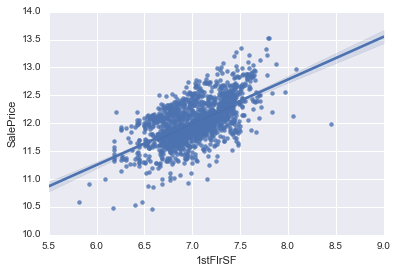

In [581]:
sns.regplot(np.log(df_house['1stFlrSF']), np.log(df_house['SalePrice']));

In [582]:
df_all_new['1stFlrSF'] = np.log(df_all['1stFlrSF'])

### 2ndFlrSF

In [583]:
df_all['2ndFlrSF'].isnull().sum()

0

In [584]:
df_all_new['2ndFlrSF'] = np.log(df_all['2ndFlrSF'] + 1)

### LowQualFinSF

In [585]:
df_all['LowQualFinSF'].isnull().sum()

0

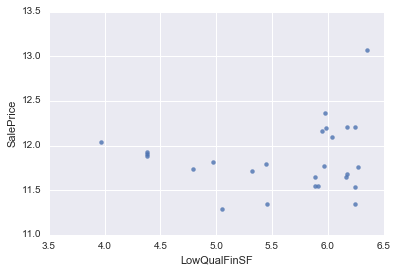

In [586]:
sns.regplot(np.log(df_house['LowQualFinSF']), np.log(df_house['SalePrice']));

In [587]:
df_all['LowQualFinSF'].value_counts().head()

0      2879
80        4
205       2
360       2
390       1
Name: LowQualFinSF, dtype: int64

In [588]:
df_all_new['LowQualFinSF'] = np.where(df_all['LowQualFinSF'] == 0, 0, 1)

In [589]:
df_all_new['LowQualFinSF'].value_counts()

0    2879
1      40
Name: LowQualFinSF, dtype: int64

### GrLivArea

In [590]:
df_all['GrLivArea'].isnull().sum()

0

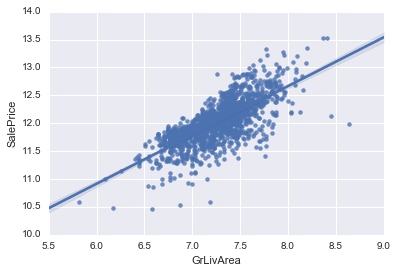

In [591]:
sns.regplot(np.log(df_house['GrLivArea']), np.log(df_house['SalePrice']));

In [592]:
df_all_new['GrLivArea'] = np.log(df_all['GrLivArea'] + 1)

### BsmtFullBath

In [593]:
df_all['BsmtFullBath'].isnull().sum()

2

In [594]:
df_all['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [595]:
cur_var = pd.get_dummies(df_all['BsmtFullBath'].fillna(0).replace(3, 2).astype(int), 'BsmtFullBath')
df_all_new = df_all_new.join(cur_var)

### BsmtHalfBath

In [596]:
df_all['BsmtHalfBath'].isnull().sum()

2

In [597]:
df_all['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [598]:
df_all_new['BsmtHalfBath'] = cur_var = df_all['BsmtHalfBath'].fillna(0).replace(2, 1)

### FullBath

In [599]:
df_all['FullBath'].isnull().sum()

0

In [600]:
df_all['FullBath'].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

In [601]:
cur_var = pd.get_dummies(df_all['FullBath'].fillna(0).replace(4, 3).astype(int), 'FullBath')
df_all_new = df_all_new.join(cur_var)

### HalfBath

In [602]:
df_all['HalfBath'].isnull().sum()

0

In [603]:
df_all['HalfBath'].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

In [604]:
cur_var = pd.get_dummies(df_all['HalfBath'], 'HalfBath')
df_all_new = df_all_new.join(cur_var)

### BedroomAbvGr

In [605]:
df_all['BedroomAbvGr'].isnull().sum()

0

In [606]:
df_all['BedroomAbvGr'].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

In [607]:
cur_var = pd.get_dummies(df_all['BedroomAbvGr'].replace(8, 6), 'BedroomAbvGr')
df_all_new = df_all_new.join(cur_var)

### KitchenAbvGr

In [608]:
df_all['KitchenAbvGr'].isnull().sum()

0

In [609]:
df_all['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [610]:
df_all_new['KitchenAbvGr'] = (df_all['KitchenAbvGr'] >= 2) * 1

In [611]:
df_all_new['KitchenAbvGr'].value_counts()

0    2788
1     131
Name: KitchenAbvGr, dtype: int64

### KitchenQual

In [612]:
df_all['KitchenQual'].isnull().sum()

1

In [613]:
df_all['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [614]:
cur_var = pd.get_dummies(df_all['KitchenQual'].fillna('TA'), 'KitchenQual')
df_all_new = df_all_new.join(cur_var)

### TotRmsAbvGrd

In [615]:
df_all['TotRmsAbvGrd'].isnull().sum()

0

In [616]:
df_all['TotRmsAbvGrd'].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [617]:
df_all_new['TotRmsAbvGrd'] = df_all['TotRmsAbvGrd'].map(lambda x: 0 if x < 4 else 1 if x < 7 else 2 if x < 11 else 3)

In [618]:
df_all_new['TotRmsAbvGrd'].value_counts()

1    1623
2    1219
3      51
0      26
Name: TotRmsAbvGrd, dtype: int64

### Functional

In [619]:
df_all['Functional'].isnull().sum()

2

In [620]:
df_all['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [621]:
cur_var = pd.get_dummies(df_all['Functional'].replace(['Maj2', 'Sev'], 'Maj1'), 'Functional')
df_all_new = df_all_new.join(cur_var)

### Fireplaces

In [622]:
df_all['Fireplaces'].isnull().sum()

0

In [623]:
df_all['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [624]:
cur_var = pd.get_dummies(df_all['Fireplaces'].replace([3, 4], 2), 'Fireplaces')
df_all_new = df_all_new.join(cur_var)

### FireplaceQu

In [625]:
df_all['FireplaceQu'].isnull().sum()

1420

In [626]:
df_all['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [627]:
cur_var = pd.get_dummies(df_all['FireplaceQu'].fillna('None'), 'FireplaceQu')
df_all_new = df_all_new.join(cur_var)

### GarageType

In [628]:
df_all['GarageType'].isnull().sum()

157

In [629]:
df_all['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [630]:
cur_var = pd.get_dummies(df_all['GarageType'].fillna('None'), 'GarageType')
df_all_new = df_all_new.join(cur_var)

### GarageYrBlt

In [631]:
garage_year_built = pd.qcut(df_all['GarageYrBlt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])

In [632]:
cur_var = pd.get_dummies(garage_year_built.astype('object').fillna('None'), 'GarageYrBlt')
df_all_new = df_all_new.join(cur_var)

### GarageCars

In [633]:
df_all['GarageCars'].isnull().sum()

1

In [634]:
df_all_new['GarageCars'] = df_all['GarageCars'].replace([4, 5], 3).fillna(0)

### GarageArea

In [635]:
df_all['GarageArea'].isnull().sum()

1

In [636]:
df_all_new['GarageArea'] = np.log(df_all['GarageArea'].fillna(0) + 1)

### GarageQual

In [637]:
df_all['GarageQual'].isnull().sum()

159

In [638]:
df_all['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [639]:
cur_var = pd.get_dummies(df_all['GarageQual'].replace({'Po':'Fa', 'Ex':'Gd'}).fillna('None'), 'GarageQual')
df_all_new = df_all_new.join(cur_var)

### GarageCond

In [640]:
df_all['GarageCond'].isnull().sum()

159

In [641]:
df_all['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [642]:
cur_var = pd.get_dummies(df_all['GarageCond'].replace({'Po':'Fa', 'Ex':'Gd'}).fillna('None'), 'GarageCond')
df_all_new = df_all_new.join(cur_var)

### PavedDrive

In [643]:
df_all['PavedDrive'].isnull().sum()

0

In [644]:
df_all['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [645]:
cur_var = pd.get_dummies(df_all['PavedDrive'], 'PavedDrive')
df_all_new = df_all_new.join(cur_var)

### WoodDeckSF

In [646]:
df_all['WoodDeckSF'].isnull().sum()

0

In [647]:
df_all_new['WoodDeckSF'] = np.log(df_all['WoodDeckSF'] + 1)

### OpenPorchSF

In [648]:
df_all['OpenPorchSF'].isnull().sum()

0

In [649]:
df_all_new['OpenPorchSF'] = np.log(df_all['OpenPorchSF'] + 1)

### EnclosedPorch

In [650]:
df_all['EnclosedPorch'].isnull().sum()

0

In [651]:
df_all_new['EnclosedPorch'] = np.log(df_all['EnclosedPorch'] + 1)

### 3SsnPorch

In [652]:
df_all['3SsnPorch'].isnull().sum()

0

In [653]:
df_all_new['3SsnPorch'] = np.log(df_all['3SsnPorch'] + 1)

### ScreenPorch

In [654]:
df_all['ScreenPorch'].isnull().sum()

0

In [655]:
df_all_new['ScreenPorch'] = np.log(df_all['ScreenPorch'] + 1)

### PoolArea

In [656]:
df_all['PoolArea'].isnull().sum()

0

In [657]:
df_all_new['PoolArea'] = np.log(df_all['PoolArea'] + 1)

### TotalPorchArea
New feature

In [658]:
df_all_new['TotalPorchArea'] = np.log(df_all['WoodDeckSF'] + 
                                      df_all['OpenPorchSF'] + 
                                      df_all['EnclosedPorch'] + 
                                      df_all['3SsnPorch'] + 
                                      df_all['ScreenPorch'] +
                                      df_all['PoolArea'] + 1)

### PoolQC

Not enough data

In [659]:
df_all['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

### Fence

In [660]:
temp = df_all['Fence'].fillna('None').replace('MnWw', 'MnPrv')

In [661]:
cur_var = pd.get_dummies(temp, 'Fence')
df_all_new = df_all_new.join(cur_var)

### MiscFeature

In [662]:
df_all['MiscFeature'].isnull().sum()

2814

In [663]:
df_all_new['MiscFeature'] = (df_all['MiscFeature'] == 'Shed') * 1

In [664]:
df_all_new['MiscFeature'].value_counts()

0    2824
1      95
Name: MiscFeature, dtype: int64

# MiscVal

In [665]:
df_all['MiscVal'].isnull().sum()

0

In [666]:
df_all_new['MiscVal'] = np.log(df_all['MiscVal'] + 1)

### MoSold

In [667]:
temp = df_all['MoSold'].map({1:'Winter', 2:'Winter', 12:'Winter',
                          3:'Spring',4:'Spring',5:'Spring',
                          6:'Summer',7:'Summer',8:'Summer',
                          9:'Fall',10:'Fall',11:'Fall'})

In [668]:
cur_var = pd.get_dummies(temp, 'MoSold')
df_all_new = df_all_new.join(cur_var)

### YrSold

In [669]:
df_all['YrSold'].isnull().sum()

0

In [670]:
cur_var = pd.get_dummies(df_all['YrSold'], 'YrSold')
df_all_new = df_all_new.join(cur_var)

### SaleType

In [671]:
df_all['SaleType'].isnull().sum()

1

In [672]:
df_all['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [673]:
cur_var = pd.get_dummies(df_all['SaleType'].replace(['CWD', 'ConLI', 'ConLw', 'Oth', 'Con'], 'Other').fillna('WD'), "SaleType")
df_all_new = df_all_new.join(cur_var)

### SaleCondition

In [674]:
df_all['SaleCondition'].isnull().sum()

0

In [675]:
df_all['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [676]:
df_house.groupby('SaleCondition')['SalePrice'].mean()

SaleCondition
Abnorml    146526
AdjLand    104125
Alloca     167377
Family     149600
Normal     175202
Partial    272291
Name: SalePrice, dtype: int64

In [677]:
cur_var = pd.get_dummies(df_all['SaleCondition'].replace(['Alloca', 'AdjLand'], 'Other'), 'SaleCondition')

In [678]:
df_all_new = df_all_new.join(cur_var)

## Done Transforming Variables

In [679]:
df_all_new.shape

(2919, 267)

In [688]:
df_train_final = df_all_new.loc[df_house.index]
df_test_final = df_all_new.loc[df_house_test.index]
y_train_final = np.log(df_house['SalePrice']).values

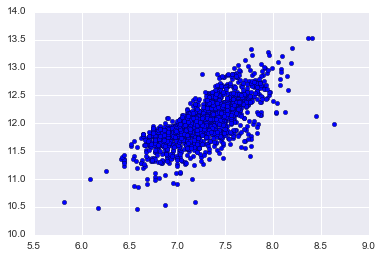

In [689]:
plt.scatter(df_train_final['GrLivArea'], y_train_final);

In [690]:
bad = ((df_train_final['GrLivArea'] > 8.3) & (y_train_final < 12.5)).values
df_train_final = df_train_final[~bad]
y_train_final = y_train_final[~bad]

In [691]:
bad.sum()

2

In [692]:
df_train_final.isnull().sum().sum()

0

In [693]:
col_names_scale = df_train_final.columns[df_train_final.max() > 5]

In [694]:
col_names_scale

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'TotalPorchArea', 'MiscVal'],
      dtype='object')

In [695]:
mean_cols_train = df_train_final.loc[:, col_names_scale].mean()
std_cols_train = df_train_final.loc[:, col_names_scale].std()
df_train_final.loc[:, col_names_scale] = (df_train_final.loc[:, col_names_scale] - mean_cols_train) / std_cols_train

In [696]:
mean_cols_test = df_test_final.loc[:, col_names_scale].mean()
std_cols_test = df_test_final.loc[:, col_names_scale].std()
df_test_final.loc[:, col_names_scale] = (df_test_final.loc[:, col_names_scale] - mean_cols_test) / std_cols_test

In [697]:
X_train_final = df_train_final.values
X_test_final = df_test_final.values

In [698]:
np.isnan(X_train_final).sum()

0

In [699]:
X_train_final.shape, y_train_final.shape

((1458, 267), (1458,))

In [700]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

In [701]:
kf = KFold(len(X_train_final), n_folds=10, shuffle=True)

In [702]:
def pred_score(y_pred, y_actual):
    return np.sqrt(np.mean((y_pred - y_actual) ** 2))

In [705]:
alphas = np.logspace(-2, 1.3, 100)
alpha_scores = {}
for alpha in alphas:
    test_scores = []
    clf = Ridge(alpha=alpha)
    for train_index, test_index in kf:
        X_train, X_test = X_train_final[train_index], X_train_final[test_index]
        y_train, y_test = y_train_final[train_index], y_train_final[test_index]
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        score = pred_score(y_pred_test, y_test)
        test_scores.append(score)
    alpha_scores[alpha] = np.mean(test_scores)

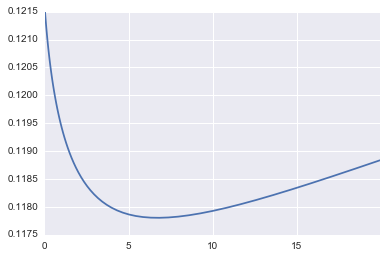

In [706]:
pd.Series(alpha_scores).plot();

In [711]:
ridge = Ridge(alpha=7)

In [712]:
ridge.fit(X_train_final, y_train_final)

Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [717]:
df_sub = pd.DataFrame({'Id': df_house_test.index, 'SalePrice':np.exp(ridge.predict(X_test_final))})
df_sub.to_csv('../data/submissions/submission13.csv', index=False)

In [376]:
def get_kfold_scores(clf, X_train_final_type):
    test_scores = []
    for train_index, test_index in kf:
        X_train, X_test = X_train_final_type[train_index], X_train_final_type[test_index]
        y_train, y_test = y_train_final[train_index], y_train_final[test_index]
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        score = pred_score(y_pred_test, y_test)
        test_scores.append(score)

    return test_scores

In [707]:
rf = RandomForestRegressor(max_features=1, n_estimators=100)

In [378]:
a = get_kfold_scores(rf, X_train_final)

In [379]:
a

[0.12129811830066368,
 0.1082437235964943,
 0.16179721632850669,
 0.15739150097199014,
 0.12992959323546727,
 0.14642237240239814,
 0.13751520553661969,
 0.13386276101678066,
 0.1465481164932875,
 0.14835653734357457]

In [708]:
rf = RandomForestRegressor(n_estimators=100)

In [709]:
rf.fit(df_all_new.iloc[:len(y_train_final)], y_train_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [710]:
np.sqrt(np.mean((rf.predict(df_all_new.iloc[:len(y_train_final)]) - y_train_final) ** 2))

0.14351288406833485

In [422]:
df_house_test['MSSubClass'].value_counts().sort_index()

20     543
30      70
40       2
45       6
50     143
60     276
70      68
75       7
80      60
85      28
90      57
120     95
150      1
160     65
180      7
190     31
Name: MSSubClass, dtype: int64

In [418]:
df_train_final['MSSubClass_150'].sum()

0.0

In [388]:
gbr = GradientBoostingRegressor(learning_rate=.03, max_depth=2, max_features=.05, n_estimators=2000)

In [389]:
gbr.fit(df_all_new.iloc[:len(y_train_final)], y_train_final)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.03, loss='ls',
             max_depth=2, max_features=0.05, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [409]:
import warnings
warnings.filterwarnings("ignore")

In [727]:
gbr = GradientBoostingRegressor()
parameters = {'max_features':[.99], 'n_estimators':[1000],
             'learning_rate':[.1], 'max_depth': [2, 3]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1)
clf.fit(X_train_final, y_train_final)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3], 'max_features': [0.99], 'n_estimators': [1000], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [728]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.99,
 'n_estimators': 1000}

In [729]:
np.sqrt(np.mean((clf.predict(df_all_new.iloc[:len(y_train_final)]) - y_train_final) ** 2 ))

0.93951143618795496

In [406]:
y_train_final

array([ 12.24769432,  12.10901093,  12.31716669, ...,  12.49312952,
        11.86446223,  11.90158345])

In [396]:
df_all_new.iloc[:len(y_train_final)]

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_COD,SaleType_ConLD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
